# Импорт необходимых библиотек
Импортируйте необходимые библиотеки, включая keras.

In [25]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

import ssl

# Загрузка и предобработка датасета cifar10
Загрузите и предобработайте датасет cifar10, включая нормализацию и преобразование меток в категориальный формат.

In [26]:
# фикс для SSL
ssl._create_default_https_context = ssl._create_unverified_context

# Загрузка датасета cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Нормализация изображений
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Преобразование меток в категориальный формат
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Создание модели сверточной нейронной сети
Создайте модель сверточной нейронной сети с использованием API Sequential keras.

In [27]:
# Создание модели сверточной нейронной сети
model = Sequential()

# Добавление сверточного слоя с 32 фильтрами размером 3x3 и функцией активации ReLU
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Добавление слоя максимального пулинга
model.add(MaxPooling2D(pool_size=(2, 2)))

# Добавление еще одного сверточного слоя с 64 фильтрами и функцией активации ReLU
model.add(Conv2D(64, (3, 3), activation='relu'))

# Добавление слоя максимального пулинга
model.add(MaxPooling2D(pool_size=(2, 2)))

# Преобразование двумерного массива в одномерный
model.add(Flatten())

# Добавление полносвязного слоя с 64 нейронами и функцией активации ReLU
model.add(Dense(64, activation='relu'))

# Добавление выходного слоя с 10 нейронами (по количеству классов) и функцией активации softmax
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

# Компиляция модели
Скомпилируйте модель, указав оптимизатор, функцию потерь и метрики.

In [28]:
# Компиляция модели
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Вывод структуры модели
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

# Обучение модели
Обучите модель на обучающем наборе данных, используя метод fit().

In [29]:
# Обучение модели
# Обучаем модель на обучающем наборе данных, используя метод fit()
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.3424 - loss: 1.8072 - val_accuracy: 0.5225 - val_loss: 1.3508
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5435 - loss: 1.2875 - val_accuracy: 0.5630 - val_loss: 1.2300
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6103 - loss: 1.1196 - val_accuracy: 0.6209 - val_loss: 1.0920
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6469 - loss: 1.0239 - val_accuracy: 0.6340 - val_loss: 1.0493
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6699 - loss: 0.9659 - val_accuracy: 0.6599 - val_loss: 0.9927
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6873 - loss: 0.9039 - val_accuracy: 0.6734 - val_loss: 0.9534
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6983 - loss: 0.8667 - val_accuracy: 0.6828 - val_loss: 0.9288
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7172 - loss: 0.8173 - 

# Оценка модели
Оцените производительность модели на тестовом наборе данных.

In [30]:
# Оцениваем производительность модели на тестовом наборе данных
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6885 - loss: 0.9202
Test accuracy: 0.6805999875068665
Test loss: 0.9437068104743958


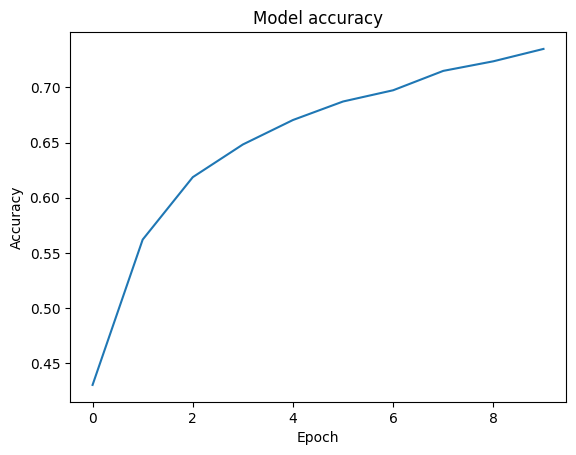

In [31]:
# График точности

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

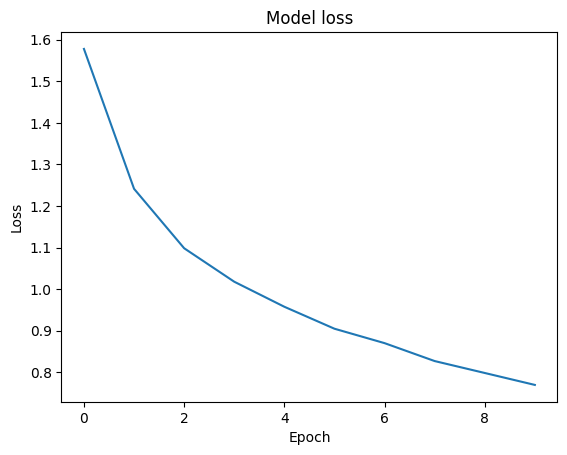

In [32]:
# График потерь

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Сохранение модели
Сохраните обученную модель для дальнейшего использования.

In [33]:
# Сохранение модели
# Сохраняем обученную модель для дальнейшего использования
model.save('cifar10_cnn_model.h5')